# Look at productivity in the Central Sills area of the CAA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import modules.mapping_functions as mf

%matplotlib inline

Parameters:

In [4]:
stn_list   = ['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9'] # stations I want to look at
color_list = ['#146870', '#3dc9b3']
var_list   = ['NO3', 'NO3_model']

Observations

In [77]:
# Concentration of dMn in 2015
Manuel       = pd.read_csv('/ocean/brogalla/GEOTRACES/data/DMn_nmolL-1_BR-edited.csv')
M_station    = Manuel['Station'].astype('string')
M_depth      = Manuel['Depth'].astype('float')
M_dMn_nmolkg = Manuel['nmol kg-1'].astype('float')
M_dMn_nmolL  = Manuel['nmol L-1'].astype('float')
M_salinity   = Manuel['Salinity'].astype('float')

In [78]:
GEOTRACES   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names   = GEOTRACES['Station names'].dropna().astype('str')
Manuel_lons = GEOTRACES['station lon'].astype('float').dropna().values
Manuel_lats = GEOTRACES['Station lat'].astype('float').dropna().values

In [180]:
# NO3 data in 2015
NO3_leg2b = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data2.csv')
NO3_leg3a = pd.read_csv('/ocean/brogalla/GEOTRACES/data/bio/NO3_data3.csv')

lon_2b   = NO3_leg2b['Longitude [degrees_east]'].astype('float').values
lat_2b   = NO3_leg2b['Latitude [degrees_north]'].astype('float').values
depth_2b = NO3_leg2b['Depth [metres]'].astype('float').values
NO3_2b   = NO3_leg2b['NTRA_01 [mmol/m**3]'].astype('float').values

lon_3a   = NO3_leg3a['Longitude [degrees_east]'].astype('float').values
lat_3a   = NO3_leg3a['Latitude [degrees_north]'].astype('float').values
depth_3a = NO3_leg3a['Depth [metres]'].astype('float').values
NO3_3a   = NO3_leg3a['NTRA_01 [mmol/m^3]'].astype('float').values

NO3       = np.array([])
N_station = np.array([]) 
N_depth   = np.array([])

for n, stn in enumerate(stn_names[5:14]):    
    # find indices associated with each station
    if n < 7: # leg 2b
        min_val   = np.amin(np.abs(lat_2b - Manuel_lats[stn_names==stn]))
        min_vals  = [i for i, x in enumerate(np.abs(lat_2b - Manuel_lats[stn_names==stn])) if x == min_val]
        depth_stn = depth_2b[min_vals]
        NO3_stn   = NO3_2b[min_vals]
    else:     # leg 3a
        min_val  = np.amin(np.abs(lat_3a - Manuel_lats[stn_names==stn]))
        min_vals = [i for i, x in enumerate(np.abs(lat_3a - Manuel_lats[stn_names==stn])) if x == min_val]  
        depth_stn = depth_3a[min_vals]
        NO3_stn   = NO3_3a[min_vals]    
        
    NO3       = np.append(NO3, NO3_stn)
    N_station = np.append(N_station, [stn]*len(depth_stn))
    N_depth   = np.append(N_depth, depth_stn)

##### Define functions

In [193]:
def read_data(var, name):
      
    if var=='NO3':
        obs_depth = N_depth[N_station==name]
        obs_var   = NO3[N_station==name]   
    elif var=='NO3_model':
        obs_depth = CanOE_depth
        obs_var   = CanOE_NO3_stations[stn_names==name][0,:]
    
    return obs_depth, obs_var

In [202]:
def plot_profile(name, ax, var, color='r', euphotic_depth=50): 
        
    # Var is variable name
    obs_depth, obs_var = read_data(var, name)
    ax.plot(obs_var, obs_depth, c=color, markersize=7, marker='.', markeredgecolor='k', markeredgewidth=0.4)
    
    ax.invert_yaxis()
    try:
#         ax.set_ylim(np.amax(obs_depth)+20,0)
#         obs_bottom = obs_var[np.argmin(np.abs(obs_depth-150))]
        ax.plot([0,15], [euphotic_depth, euphotic_depth],'--k')
        ax.set_ylim(150,0)
        ax.set_xlim(0, 15)
        ax.set_xticks([0,5,10,15])
        ax.tick_params(axis='both', labelsize=6)
    except:
        print('empty obs depth array')
        
    if name==stn_list[0]:
        ax.set_ylabel(var, fontsize=7)
    else:
        ax.yaxis.set_ticklabels([])
    if var==var_list[0]:
        ax.set_title(name, fontsize=7)
        
    return

Plot:

In [211]:
# Check if sorted:
for stn in stn_list:
    flag = 0
    original_list  = list(N_depth[N_station==stn]) 
    sort_test_list = sorted(list(N_depth[N_station==stn]))
    if (sort_test_list == original_list):
        flag = 1

    # printing result
    if (flag) :
        print(f"Yes, {stn} observed depths are sorted.")
    else :
        print(f"No, {stn} observed depths are not sorted.")

Yes, CAA1 observed depths are sorted.
Yes, CAA2 observed depths are sorted.
Yes, CAA3 observed depths are sorted.
Yes, CAA4 observed depths are sorted.
Yes, CAA5 observed depths are sorted.
Yes, CAA6 observed depths are sorted.
Yes, CAA7 observed depths are sorted.
Yes, CAA8 observed depths are sorted.
Yes, CAA9 observed depths are sorted.


In [204]:
month = 8

CanOE = nc.Dataset('/ocean/brogalla/GEOTRACES/data/bio/NAA_730h_20150101_20151231_ptrc_T_no3.nc')
CanOE_depth = np.array(CanOE.variables['deptht'])
CanOE_lons  = np.array(CanOE.variables['nav_lon'])
CanOE_lats  = np.array(CanOE.variables['nav_lat'])
CanOE_time  = np.array(CanOE.variables['time_counter'])
CanOE_NO3   = np.array(CanOE.variables['no3'])[month,:,:,:] # units of mmol/m3

In [205]:
Manuel_i, Manuel_j = mf.find_indeces_vector(Manuel_lons, Manuel_lats, CanOE_lons, CanOE_lats, \
                                            tols={'NEMO': {'tol_lon': 0.15, 'tol_lat': 0.12},
                                                'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
                                               })

In [206]:
CanOE_NO3_stations = np.zeros((len(stn_names),len(CanOE_depth)))
for n,stn in enumerate(stn_names):
    try:
        CanOE_NO3_stations[n,:] = CanOE_NO3[:,int(Manuel_i[n]),int(Manuel_j[n])]
    except:
        CanOE_NO3_stations[n,:] = np.full(CanOE_depth.shape, np.nan)

In [207]:
# Calculate bottom of euphotic zone based on NO3 observed profiles:
euphotic_depth_obs = euphotic_depth_obs   = [70, 30, 45, 85, 75, 75, 50, 65, 55]
total_uptake_obs   = np.zeros(len(euphotic_depth_obs))
max_depth_obs      = np.zeros(len(euphotic_depth_obs))
for s, stn in enumerate(stn_list):
    
    # Reference NO3 concentration at bottom of the euphotic zone:
    NO3_ref_obs    = NO3[N_station==stn][np.argmin(np.abs(N_depth[N_station==stn]-euphotic_depth_obs[s]))]
    local_uptake_obs   = 0
    for d, depth in enumerate(N_depth[N_station==stn]):
        if d==0: # grid box thickness is depth relative to the surface
            local_uptake_obs += (NO3[N_station==stn][d] - NO3_ref_obs)*(N_depth[N_station==stn][d] - 0)
        elif (depth < euphotic_depth_obs[s]):
            local_uptake_obs += (NO3[N_station==stn][d] - NO3_ref_obs)*(N_depth[N_station==stn][d]-N_depth[N_station==stn][d-1])
            depth_max         = depth # Save total depth over which nitrate uptake is estimated
            
    total_uptake_obs[s] = local_uptake_obs
    max_depth_obs[s]    = depth_max

In [210]:
# Calculate bottom of euphotic zone based on NO3 model profiles (CanOE):
euphotic_depth_model = [100, 100, 60, 100, 60, 40, 50, 100, np.nan]
total_uptake_model   = np.zeros(len(euphotic_depth_model))
max_depth_model      = np.zeros(len(euphotic_depth_model))
for s, stn in enumerate(stn_list):
    NO3_ref_model    = CanOE_NO3_stations[stn_names==stn][0,:][np.argmin(np.abs(CanOE_depth-euphotic_depth_model[s]))]
    
    local_uptake_model = 0
    for d, depth in enumerate(CanOE_depth):
        if d==0:
            local_uptake_model += (CanOE_NO3_stations[stn_names==stn][0,d] - NO3_ref_model)*(CanOE_depth[d])
        elif (depth < euphotic_depth_model[s]):
            local_uptake_model += (CanOE_NO3_stations[stn_names==stn][0,d] - NO3_ref_model)*(CanOE_depth[d]-CanOE_depth[d-1])
            depth_max          = depth
            
    total_uptake_model[s] = local_uptake_model
    max_depth_model[s]    = depth_max

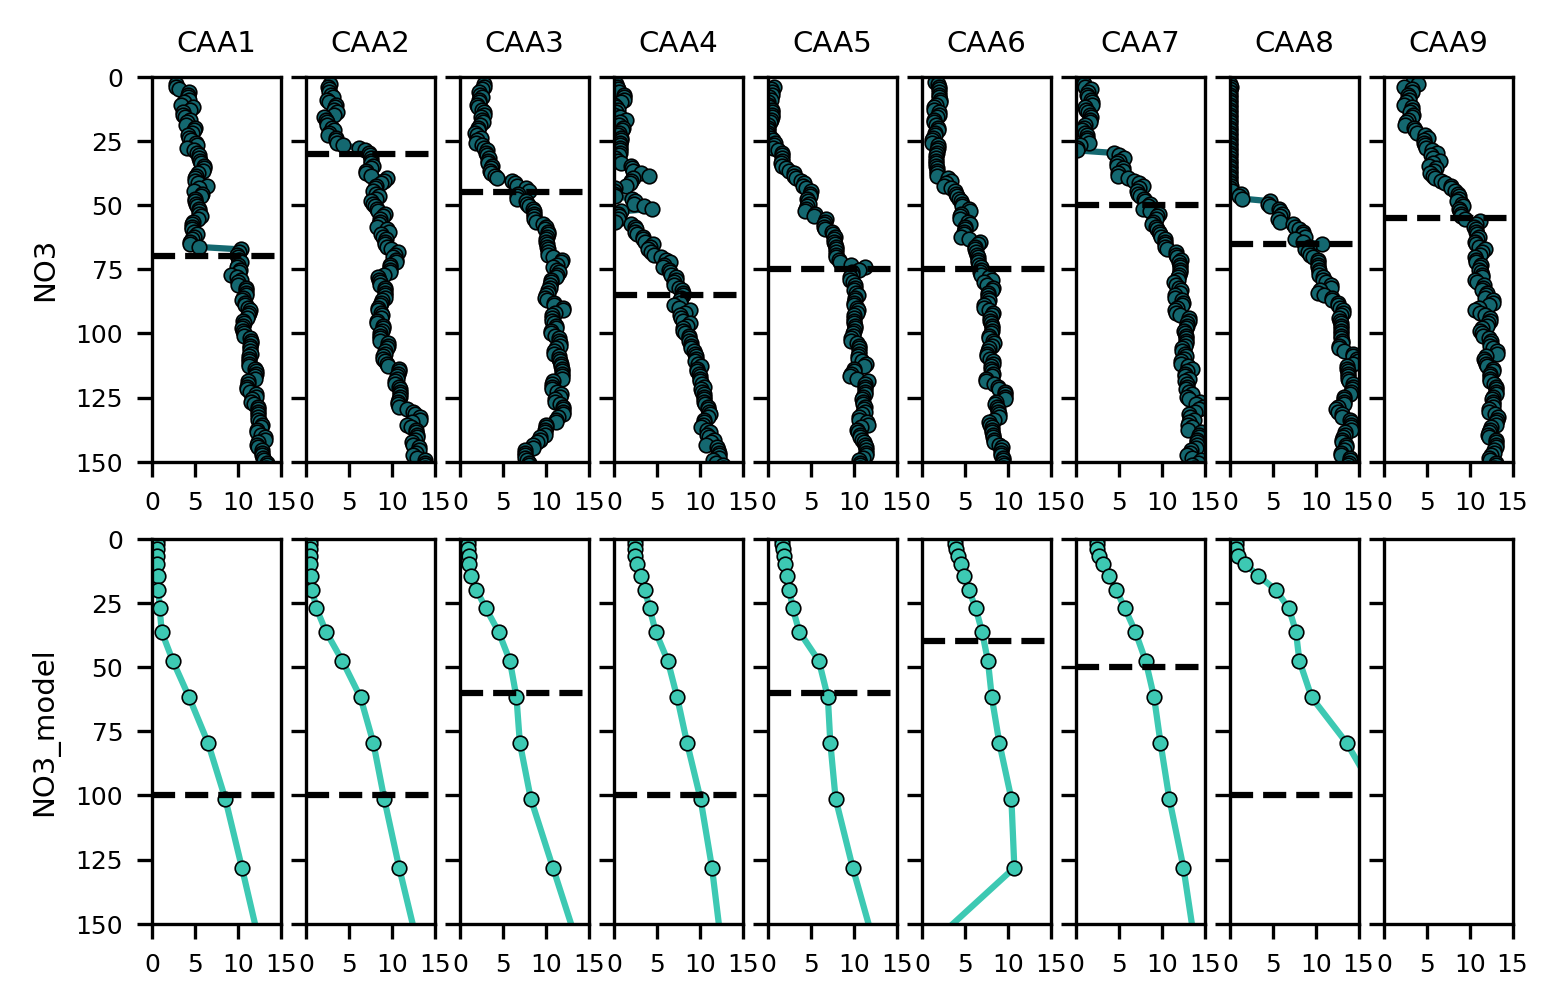

In [209]:
fig, ax = plt.subplots(2,9,figsize=(4.5*1.3, 3.74), dpi=300)
for v, var in enumerate(var_list):
    for n, stn in enumerate(stn_list):
        if var=='NO3_model':
            plot_profile(stn, ax[v,n], var, euphotic_depth=euphotic_depth_model[n], color=color_list[v])    
        else:
            plot_profile(stn, ax[v,n], var, euphotic_depth=euphotic_depth_obs[n], color=color_list[v])    

In [153]:
print(f'{stn_list}')
print(f'Observed nitrate uptake in mmol/m3: {[f"{num:.1f}" for num in -total_uptake_obs/max_depth_obs]}')
print(f'Model nitrate uptake in mmol/m3: {[f"{num:.1f}" for num in -total_uptake_model/max_depth_model]}')
print(f'Difference observed - modeled: {[f"{num:.1f}" for num in -total_uptake_obs/max_depth_obs + total_uptake_model/max_depth_model]}')

['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9']
Observed nitrate uptake in mmol/m3: ['5.1', '4.0', '4.9', '5.6', '7.1', '3.6', '5.1', '8.9', '4.2']
Model nitrate uptake in mmol/m3: ['5.6', '5.1', '3.3', '4.3', '3.6', '1.4', '2.5', '9.3', 'nan']
Difference observed - modeled: ['-0.5', '-1.1', '1.5', '1.3', '3.6', '2.1', '2.6', '-0.4', 'nan']



### Extended Redfield ratio

Twining and Baines, 2013 (annual review): generalized metal abundance ranking of Fe≈Zn > Mn≈Ni≈Cu >> Co≈Cd. Values in studies mentioned for Mn range from 0.3 to 5 with North Atlantic Ocean study giving 1.6. Higher range are also in North Atlantic but from studies that give a very broad range for all nutrients.

Kuss and Kremling, 1999 --- North Atlantic Ocean:

$$ (C_{180} N_{23} P_{1})_{1000} Fe_{5} Zn_{2} Mn_{1.6} Ni_{1} Cd_{0.5} Cu_{0.4} Co_{0.2} Pb_{0.04} $$
--> I think this is the main one that I'll end up using

Estimated by Bruland et al.(1991) for plankton samples analysed by Martin and Knauer (1973) and Martin et al. (1976):

$$ (C_{106} N_{16} P_{1})_{1000} Fe_{5} Zn_{2} Cu_{0.4} Mn_{0.4} Ni_{0.4} Cd_{0.4} $$
- Martin et al., 1976: $$ P_{1})_{1000} Fe_{5} Zn_{1.8} Mn_{0.38} Cu_{0.38} Ni_{0.35} Cd_{0.46} $$
- Martin and Knauer, 1973: $$ P_{1})_{1000} Fe_{5.2} Zn_{0.8} Mn_{0.4} Cu_{0.2} Ni_{0.2} Cd_{0.07} $$

Vu and Sohrin, 2013 also give a stoichiometric ratio in a plot.

Moore, 2016 based on data from Ho et al., (2003): "The elemental composition of some marine phytoplankton"

$$(C_{7.75} N_{1} Si_{1} P_{0.0625})_{1000} Fe_{0.469} Mn_{0.175} Ni_{0.0625} Zn_{0.05} Cd_{0.013} $$
$$(C_{124} N_{16} Si_{16} P_{1})_{1000} Fe_{7.5} Mn_{2.8} Ni_{1} Zn_{0.8} Cd_{0.2} $$


In [156]:
R_MnNO3   = 1.6/16000 # Redfield ratio NO3:Mn

uptake_NO3_molL_obs   = (-total_uptake_obs/max_depth_obs)*1e-3*1e-3     # mmol/m3 --> mmol/L --> mol/L
uptake_NO3_molL_model = (-total_uptake_model/max_depth_model)*1e-3*1e-3 # mmol/m3 --> mmol/L --> mol/L
uptake_Mn_obs         = uptake_NO3_molL_obs*R_MnNO3*1e9   # mol/L --> nmol/L
uptake_Mn_model       = uptake_NO3_molL_model*R_MnNO3*1e9 # mol/L --> nmol/L

print(f'Uptake of Mn (nmol/L) in euphotic zone at each station:')
for s, stn in enumerate(stn_list):
    print(f'Station {stn}, obs: {uptake_Mn_obs[s]:.2f}, model: {uptake_Mn_model[s]:.2f}, difference: {uptake_Mn_obs[s] - uptake_Mn_model[s]:.2f}')

Uptake of Mn (nmol/L) in euphotic zone at each station:
Station CAA1, obs: 0.51, model: 0.56, difference: -0.05
Station CAA2, obs: 0.40, model: 0.51, difference: -0.11
Station CAA3, obs: 0.49, model: 0.33, difference: 0.15
Station CAA4, obs: 0.56, model: 0.43, difference: 0.13
Station CAA5, obs: 0.71, model: 0.36, difference: 0.36
Station CAA6, obs: 0.36, model: 0.14, difference: 0.21
Station CAA7, obs: 0.51, model: 0.25, difference: 0.26
Station CAA8, obs: 0.89, model: 0.93, difference: -0.04
Station CAA9, obs: 0.42, model: nan, difference: nan
